[View in Colaboratory](https://colab.research.google.com/github/alvi-subhan/Deep-learning-using-keras/blob/master/imdb.ipynb)

In [0]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
from keras.datasets import imdb

In [0]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 4s 2us/step


In [0]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[5000]])

In [0]:
decoded_review

"? i think this could've been a decent movie and some of its parts are ok but in whole it's a b movie same about the plot parts are ok but it has several holes and ? that doesn't quite add up acting is mostly ok i've seen worse of this too br br the beginning sets the level with cars driving in the desert making cool but totally unnecessary jumps through some small ? in slow motion cool like the drivers had never seen sand before it gets slightly better from there but not much br br if you're gonna rent this get another one too and use this one as a warm up keep expectations low and it might work for you"

In [0]:
train_labels[5000]

0

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[24999]])

In [0]:
print("label of the review",train_labels[24999])
decoded_review

label of the review 0


"? as a big fan of the original film it's hard to watch this show the ? set ? and ? ? sets rob any style from this remake the mood is never there instead it has the look and feel of so many television movies of the seventies crenna is not a bad choice as walter ? but his snappy wardrobe and ? apartment don't fit the mood of the original or make him an interesting character he does his best to make it work but samantha ? is a really bad choice the english accent and california looks can't hold a candle to barbara ? ? voice and sex appeal lee j ? tries ? to fashion barton ? but even his performance is just gruff without style br br it feels like the tv movie it was and again reminds me of what a remarkable film the original still is"

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
import pandas as pd
import numpy as np
x=test_data[50]
print(len(x))
col=[i for i in range(1,18)]
pd.DataFrame(np.reshape(x,(17,17)),columns=col)

289


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,86,7,13,144,213,46,15,13,343,8,119,2,4,2,17,6
1,506,5,13,66,510,4,20,60,151,13,244,11,61,2,10,10,21
2,14,20,16,38,78,13,16,3013,8,28,77,6,337,11,61,1940,10
3,10,608,608,13,124,14,9,6,20,18,362,5,218,3711,33,84,40
4,72,553,21,14,9,61,2334,23,4,20,18,85,84,7,61,559,10
5,10,4,293,8510,11,14,22,9,4,410,12,47,8,30,4,91,616
6,109,13,28,110,11,6,6156,20,869,60,53,616,95,4,185,506,11
7,1939,9395,12,47,4,91,616,544,5,2,187,1118,379,183,5,231,60
8,53,379,795,13,124,2,102,713,618,312,7105,21,14,16,3503,8,60
9,6,241,291,2,1663,10,10,4129,121,16,4,65,960,2,2,69,6


In [0]:
pd.DataFrame(np.reshape(x_test[50],(500,20)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
print(y_train[1])
train_labels[1]


0.0


0

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.5096 - acc: 0.7799 - val_loss: 0.3824 - val_acc: 0.8663
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.3011 - acc: 0.9043 - val_loss: 0.2994 - val_acc: 0.8910
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2162 - acc: 0.9285 - val_loss: 0.3073 - val_acc: 0.8725
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1730 - acc: 0.9436 - val_loss: 0.2828 - val_acc: 0.8851
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1400 - acc: 0.9549 - val_loss: 0.2853 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.1123 - acc: 0.9659 - val_loss: 0.3126 - val_acc: 0.8788
Epoch 7/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0952 - acc: 0.9721 - val_loss: 0.3161 - 

15000/15000 [==============================] - 2s 114us/step - loss: 0.0636 - acc: 0.9823 - val_loss: 0.3706 - val_acc: 0.8754
Epoch 10/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0543 - acc: 0.9851 - val_loss: 0.3905 - val_acc: 0.8788
Epoch 11/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0412 - acc: 0.9908 - val_loss: 0.4255 - val_acc: 0.8755
Epoch 12/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0366 - acc: 0.9922 - val_loss: 0.4636 - val_acc: 0.8672
Epoch 13/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0283 - acc: 0.9940 - val_loss: 0.4769 - val_acc: 0.8731
Epoch 14/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0223 - acc: 0.9956 - val_loss: 0.5088 - val_acc: 0.8721
Epoch 15/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0170 - acc: 0.9979 - val_loss: 0.5367 - val_acc: 0.8698
Epoch 16/20
15000/15000 [==============

15000/15000 [==============================] - 2s 114us/step - loss: 0.0092 - acc: 0.9985 - val_loss: 0.6454 - val_acc: 0.8668
Epoch 19/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0047 - acc: 0.9999 - val_loss: 0.7117 - val_acc: 0.8595
Epoch 20/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.0084 - acc: 0.9983 - val_loss: 0.7057 - val_acc: 0.8659


In [0]:
type(history.history)

dict

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

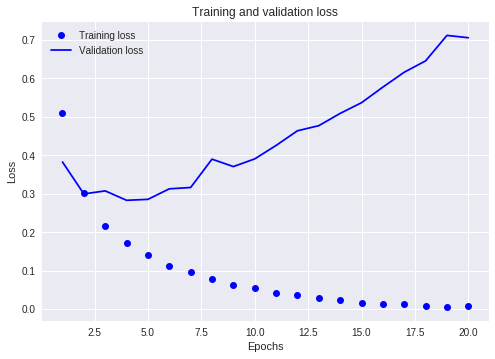

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

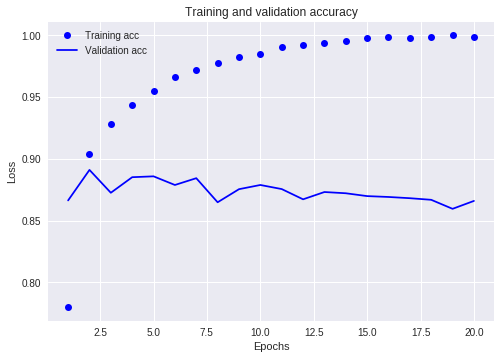

In [0]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4721 - acc: 0.8202
Epoch 2/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.2628 - acc: 0.9112
Epoch 3/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.1986 - acc: 0.9304
Epoch 4/4
25000/25000 [==============================] - 2s 88us/step
[0.33024568992614745, 0.87048]


In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512,validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)


Train on 25000 samples, validate on 10000 samples
Epoch 1/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.4488 - acc: 0.8255 - val_loss: 0.2901 - val_acc: 0.9122
Epoch 2/4
25000/25000 [==============================] - 3s 100us/step - loss: 0.2605 - acc: 0.9106 - val_loss: 0.1983 - val_acc: 0.9378
Epoch 3/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.2001 - acc: 0.9284 - val_loss: 0.1656 - val_acc: 0.9472
Epoch 4/4
25000/25000 [==============================] - 2s 95us/step
[0.2935214962387085, 0.88484]


In [0]:
model.predict(x_test)

NameError: ignored

In [0]:
keras.utils.to_categorical(train_labels)


NameError: ignored